In [ ]:
!pip install neurodynex3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: matplotlib
    Found

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from copy import deepcopy

## Hopfield network model

In this simplified Hopfied model, each neuron can only take values +1 or -1. The network stores pixel patterns, and attempts to retrieve them given some cue in the form of a part of the original pattern used to set an initial state $S_i(t=0)$ for every neuron in the network. The network activation of all the neurons evolves as follows

$$S_i(t+1) = sgn\left(\sum_j{w_{ij} S_j(t)}\right), $$

where the weight of every synaptic connection is calculated as,

$$w_{ij} = \frac{1}{N} \sum_{\mu}{p_i^\mu p_j^\mu}, $$

where in turn, $N$ is the number of neurons, and $p_i^\mu$ is the state of the $i^{th}$ neuron for encoding pattern $\mu$.

The code below is taken from this [link](https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html). Follow the accompanying exercises to be better prepared for your assignment. Remember to install all needed libraries before trying to run it.

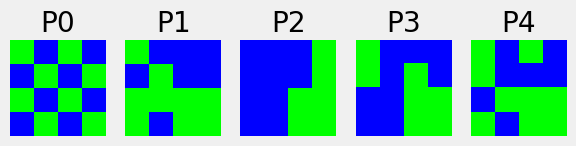

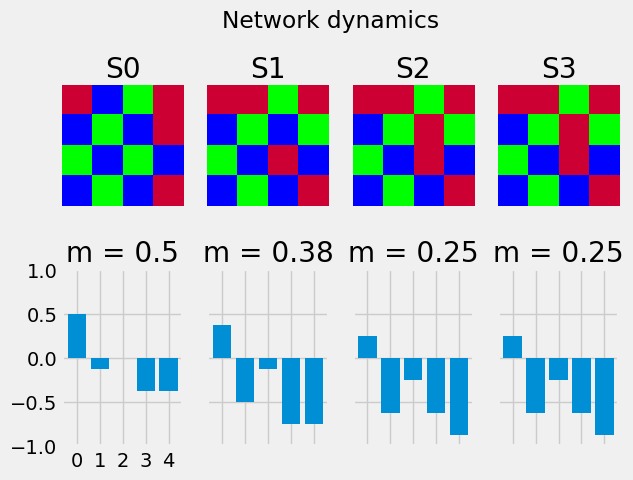

In [ ]:
%matplotlib inline
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=4, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
#plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=3)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


## Our own Hopfield network model

You will write your own code to build a Hopfield network. I am leaving sample expected results below as a guide.

In [ ]:
plist = get_patterns(4,5)
#plot_tools.plot_pattern_list(plist)

cue = deepcopy(plist)

S = perturb_pattern(cue[0],3)
wghts = calculate_weights(plist, pattern_size)

state_list =[S]
#state_list.append(S)
#print(state_list)
#plot_tools.plot_pattern(S)
for i in range(3):
    state_list.append(network_evolution(S,wghts))
#    state_list.append(S)

plot_tools.plot_pattern_list(plist)
#print(state_list[0])
plot_tools.plot_pattern(state_list[0])
plot_tools.plot_state_sequence_and_overlap(state_list, plist, reference_idx=0, suptitle="Network dynamics")

NameError: name 'get_patterns' is not defined

## Assignment 1

Q1. Can you write you own Hopfield network model that works more or less like the one simulated above? (20 points)

Q2. Run the model with different parameters to figure out how the model's capacity to retrieve the correct pattern in response to a cue deteriorates as a function of
(a) the informativeness of the cue
(b) the number of other patterns stored in the network
(c) the size of the network

Present your answers with plots and/or math. (20 points)

Q3. Can you write a function that converts MNIST digit [data](https://gitlab.com/datapythonista/mnist) to the sort of patterns used in this simulation? (20 points)

Q4. Can you write an MNIST classifier using the Hopfield network?. Can you characterize its performance using F-score, and compare with [classical](https://github.com/ksopyla/svm_mnist_digit_classification) and [deep](https://github.com/hwalsuklee/tensorflow-mnist-cnn) supervised learning methods? Remember that you can always use multiple samples of the same digit even for the Hopfield network classifier. Summarize your sense of the merits and demerits of using a Hopfield network as a classifier (40 points)

## Question 1
Below I have tried to replicate the Hopfield Network from scatrch using basic libraries like numpy and matplotlib only

In [2]:
def plot_pattern(pattern, title="Pattern"):
        """Visualizes a pattern as a grid."""
        size = int(np.sqrt(len(pattern)))
        grid = pattern.reshape((size, size))
        plt.imshow(grid, cmap="gray", interpolation="nearest")
        plt.title(title)
        plt.axis("off")
        plt.show()

In [3]:
def plot_patterns_together(patterns):
    """Plots multiple patterns in a subplot grid."""
    n = len(patterns)
    grid_size = int(np.sqrt(len(patterns[0])))  # Assuming square patterns
    fig, axes = plt.subplots(1, n, figsize=(n * 2, 2))  # Adjust width based on number of patterns

    for i, pattern in enumerate(patterns):
        ax = axes[i] if n > 1 else axes
        grid = pattern.reshape((grid_size, grid_size))
        ax.imshow(grid, cmap="gray", interpolation="nearest")
        ax.set_title(f"Pattern {i+1}")
        ax.axis("off")
    plt.axis("off")
    plt.show()

In [5]:
import random

def flip_k_random_signs(arr, k):
    indices = random.sample(range(len(arr)), k)  # Choose k unique random indices
    for i in indices:
        arr[i] *= -1  # Flip the sign
    return arr

In [6]:
def compute_similarity(state, patterns):
    """Computes similarity of the given state to each stored pattern."""
    return [np.dot(state, pattern) / len(pattern) for pattern in patterns]

def plot_similarity(similarities):
    """Plots the similarity of the given state to each stored pattern."""
    n = len(similarities)
    grid_size = int(np.sqrt(len(similarities[0])))  # Assuming square patterns
    fig, axes = plt.subplots(1, n, figsize=(n * 2, 2))
    # similarities = compute_similarity(state, patterns)
    for i, similarity in enumerate(similarities):
        ax = axes[i] if n > 1 else axes
        ax.bar(range(len(similarity)), similarity, color='blue')
        if i == 0:
            ax.set_xlabel("Pattern Index")
            ax.set_ylabel("Similarity")
    # plt.figure(figsize=(6, 4))
    # plt.bar(range(len(patterns)), similarities, color='blue')
    # plt.xlabel("Pattern Index")
    # plt.ylabel("Similarity")
    plt.title("Similarity to Stored Patterns")
    plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))

    def store_patterns(self, patterns):
        """Stores multiple patterns using Hebbian learning."""
        self.weights = np.zeros((self.num_neurons, self.num_neurons))
        for pattern in patterns:
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)  # No self-connections
        self.weights /= len(patterns[0])
        # print(self.weights)

    def update(self, state, steps=5):
        """Updates the network state asynchronously."""
        for _ in range(steps*self.num_neurons):
            i = np.random.randint(0, self.num_neurons)  # Random neuron update
            state[i] = 1 if np.dot(self.weights[i], state) >= 0 else -1
        return state

    def recall(self, state, og_patterns, steps=10):
        """Recovers stored pattern from a noisy input."""
        # fig, axes = plt.subplots(1, steps, figsize=(steps * 2, 2))
        patterns = []
        similarities = []
        for _ in range(steps):
            state = self.update(state,1)
            patterns.append(state)
            similarities.append(compute_similarity(state, og_patterns))
        plot_patterns_together(patterns)
        plot_similarity(similarities)
        return state

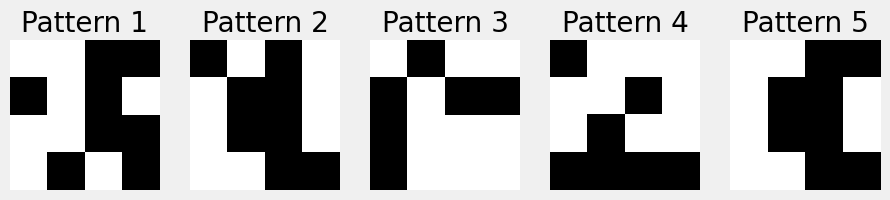

Noisy Pattern: [-1  1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1 -1]


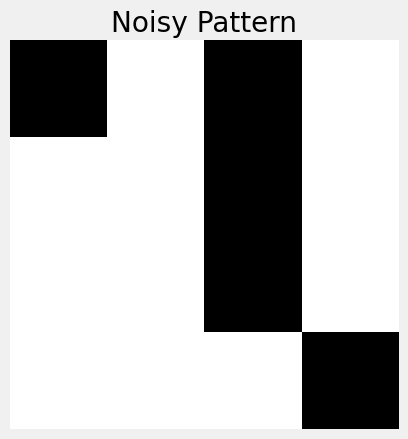

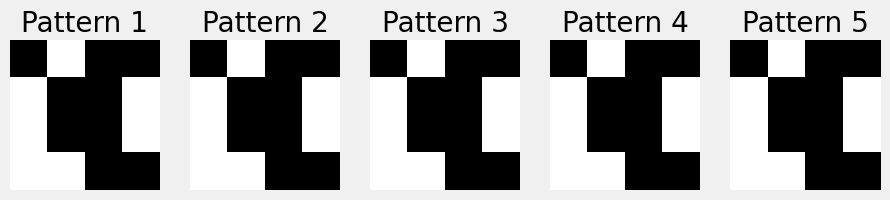

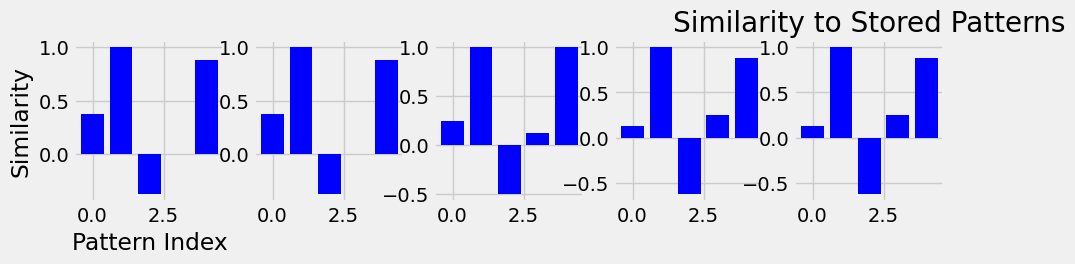

In [8]:
# Generate N lists of 4 elements each, with values +1 or -1
N = 5  # Change this to generate more lists
len_sq = 4
patterns = np.random.choice([-1, 1], size=(N, len_sq**2))
plot_patterns_together(patterns)

# Initialize Hopfield network
hopfield_net = HopfieldNetwork(num_neurons=len_sq**2)
hopfield_net.store_patterns(patterns)

# Introduce noise to a pattern
# noisy_pattern = np.random.choice([-1, 1], size=len_sq**2)
noisy_pattern = flip_k_random_signs(patterns[1],3)
print("Noisy Pattern:", noisy_pattern)
plot_pattern(pattern=noisy_pattern, title="Noisy Pattern")
recovered_pattern = hopfield_net.recall(noisy_pattern,patterns,5)

# print("Recovered Pattern:", recovered_pattern)

# Visualize patterns
# plot_pattern(pattern=recovered_pattern, title="Recovered Pattern")

<details>
  <summary><strong>TA Feedback</strong></summary>
  <h4>Marks Given: 18/20</h4>
  Great work at getting the network to work in asynchronous mode. You should have also tried this for a synchronous network in order to compare the behavior of both in terms of convergence and other properties.
</details>

## Question 2
We will now evaluate the model on various parameters and look at how the results look like

In [9]:
class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))

    def train(self, patterns):
        """Train the Hopfield network using Hebbian learning."""
        self.weights = np.zeros((self.size, self.size))
        for pattern in patterns:
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)  # No self-connections
        self.weights /= float(len(patterns[0]))
        # print(self.weights)

    def retrieve(self, cue, steps=5):
        """Retrieve the closest stored pattern using asynchronous updates."""
        state = cue.copy()
        for _ in range(steps * self.size):  # More iterations for stability
            i = np.random.randint(0, self.size)  # Random neuron update
            state[i] = np.sign(np.dot(self.weights[i], state)) or state[i]  # Avoid 0 state
        return state

    def compute_accuracy(self, patterns, cues):
        """Compute retrieval accuracy by comparing retrieved patterns to stored ones."""
        correct = 0
        for pattern, cue in zip(patterns, cues):
            retrieved = self.retrieve(cue)
            if np.array_equal(retrieved, pattern):
                correct += 1
        return correct / len(patterns)

In [10]:
def generate_patterns(num_patterns, size):
    return [np.random.choice([-1, 1], size) for _ in range(num_patterns)]

def add_noise(pattern, noise_level):
    """Flip some bits in the pattern to simulate an imperfect cue."""
    noisy_pattern = pattern.copy()
    flip_indices = np.random.choice(len(pattern), int(noise_level * len(pattern)), replace=False)
    noisy_pattern[flip_indices] *= -1
    return noisy_pattern

Effect due to noise levels

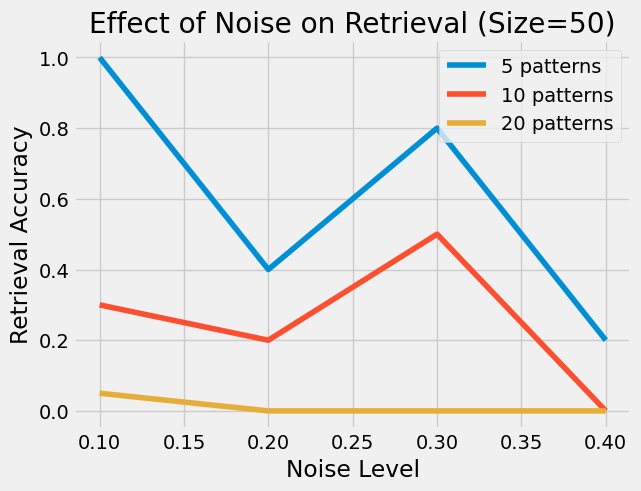

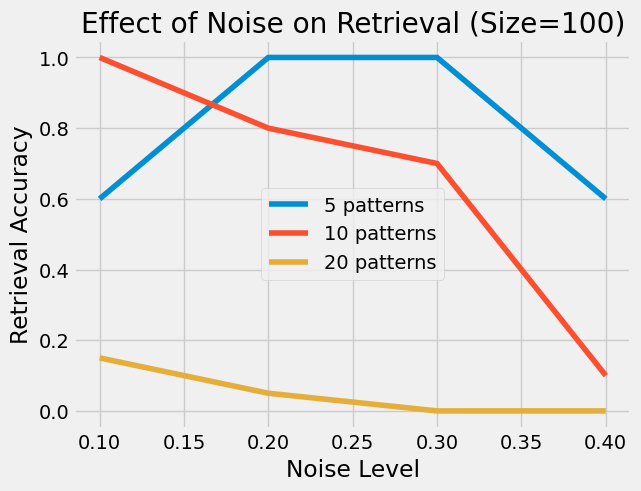

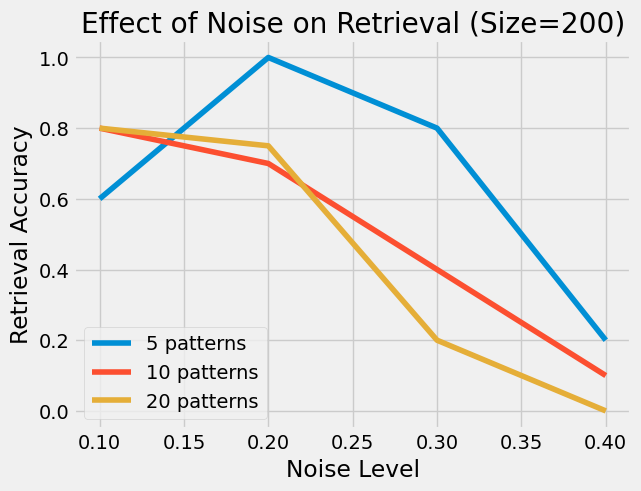

In [11]:
network_sizes = [50, 100, 200]  # Different network sizes
num_patterns_list = [5, 10, 20]  # Number of stored patterns
noise_levels = [0.1, 0.2, 0.3, 0.4]  # Informativeness of cue

results = {}

for size in network_sizes:
    for num_patterns in num_patterns_list:
        for noise in noise_levels:
            hopfield = HopfieldNetwork(size)
            patterns = generate_patterns(num_patterns, size)
            hopfield.train(patterns)

            cues = [add_noise(p, noise) for p in patterns]
            accuracy = hopfield.compute_accuracy(patterns, cues)

            results[(size, num_patterns, noise)] = accuracy
            # print(f"Size: {size}, Patterns: {num_patterns}, Noise: {noise}, Accuracy: {accuracy:.2f}")

# Plot results
for size in network_sizes:
    plt.figure()
    for num_patterns in num_patterns_list:
        accuracies = [results[(size, num_patterns, noise)] for noise in noise_levels]
        plt.plot(noise_levels, accuracies, label=f"{num_patterns} patterns")
    plt.xlabel("Noise Level")
    plt.ylabel("Retrieval Accuracy")
    plt.title(f"Effect of Noise on Retrieval (Size={size})")
    plt.legend()
    plt.show()

Effect due to number of patterns stored

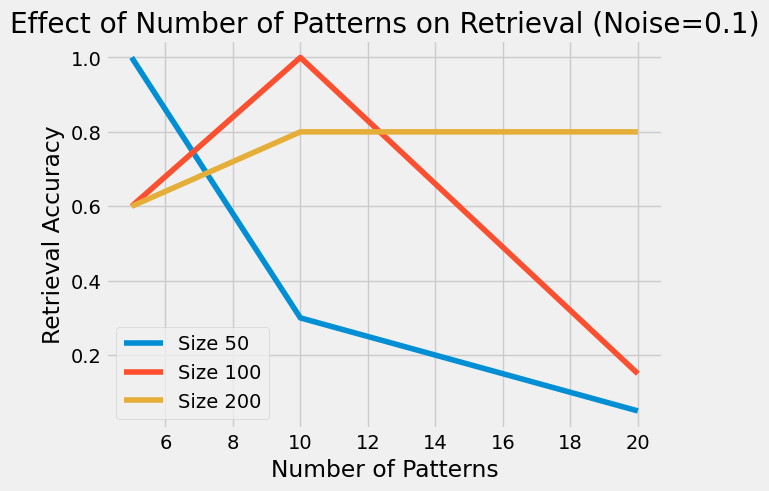

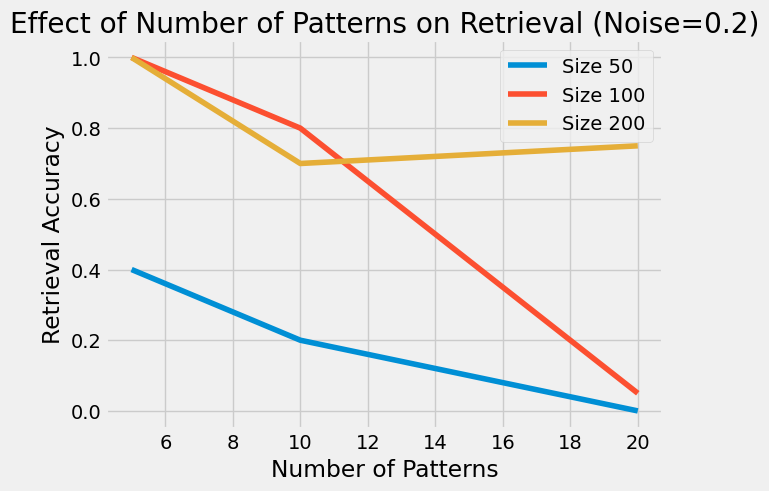

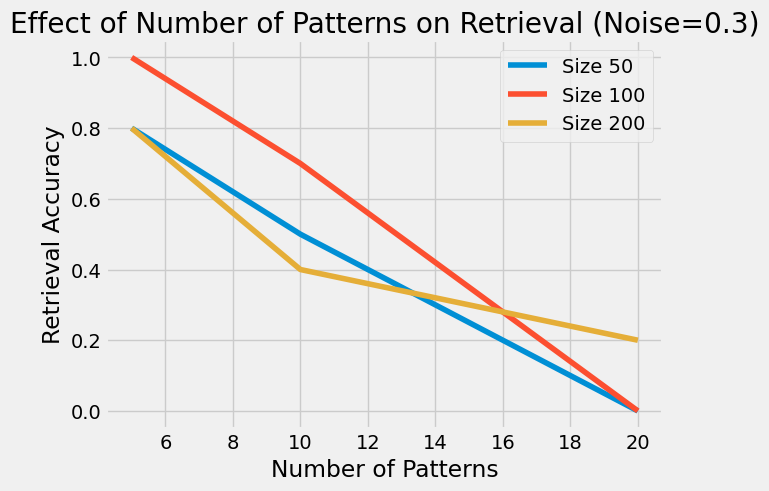

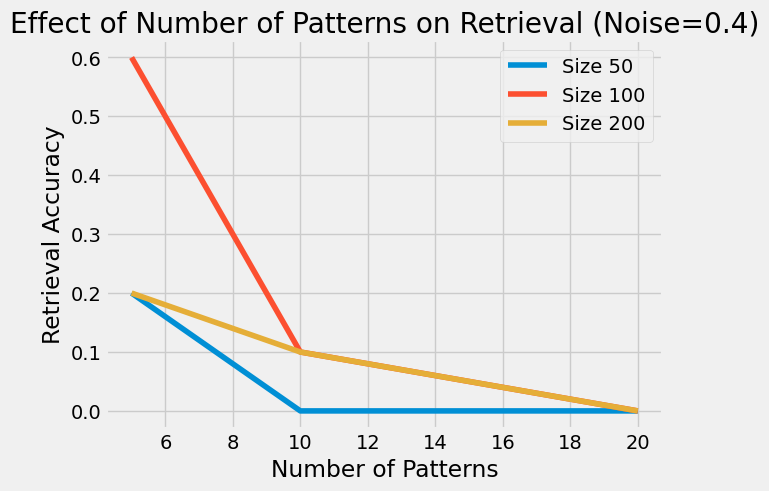

In [12]:
# Plot accuracy variations due to number of patterns
for noise in noise_levels:
    plt.figure()
    for size in network_sizes:
        accuracies = [results[(size, num_patterns, noise)] for num_patterns in num_patterns_list]
        plt.plot(num_patterns_list, accuracies, label=f"Size {size}")
    plt.xlabel("Number of Patterns")
    plt.ylabel("Retrieval Accuracy")
    plt.title(f"Effect of Number of Patterns on Retrieval (Noise={noise})")
    plt.legend()
    plt.show()

Effect due to Network Size

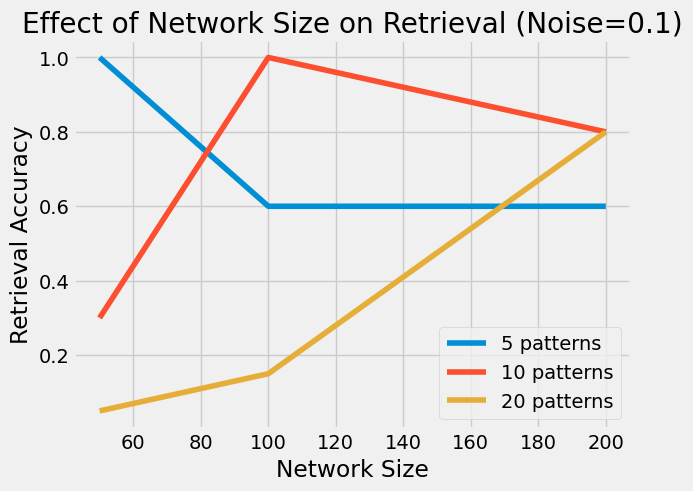

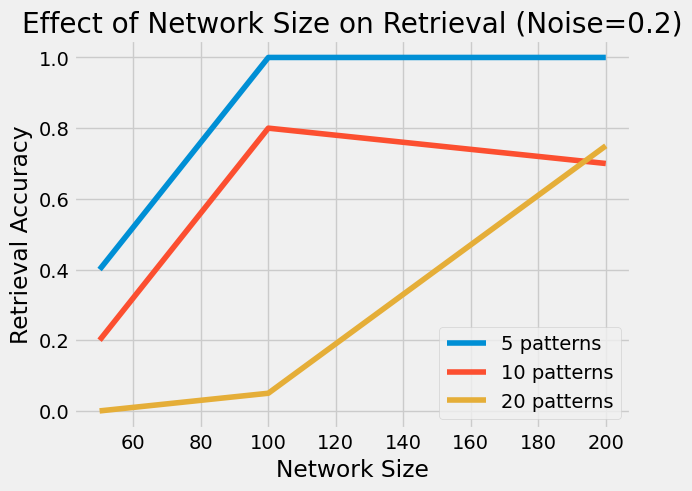

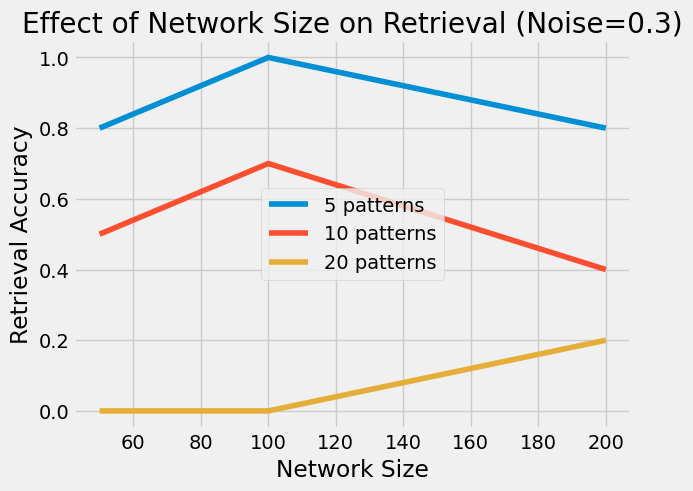

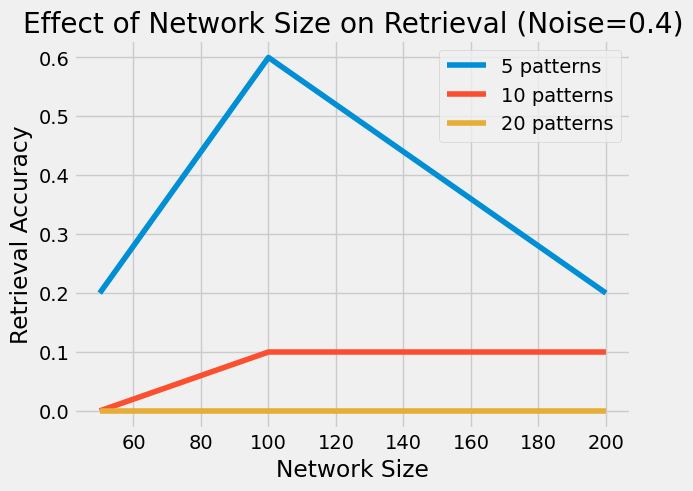

In [13]:
# Plot accuracy variations due to network size
for noise in noise_levels:
    plt.figure()
    for num_patterns in num_patterns_list:
        accuracies = [results[(size, num_patterns, noise)] for size in network_sizes]
        plt.plot(network_sizes, accuracies, label=f"{num_patterns} patterns")
    plt.xlabel("Network Size")
    plt.ylabel("Retrieval Accuracy")
    plt.title(f"Effect of Network Size on Retrieval (Noise={noise})")
    plt.legend()
    plt.show()

<details>
  <summary><strong>TA Feedback</strong></summary>
  <h4>Marks Given: 19/20</h4>
  Great work at plotting the different variations to show how the network behaves when these parameters are varied. For 2a., i would suggest looking into a better defintion of the informativeness of the cue. Also, I have reduced one point for not providing summary descriptions for each sub-question (as stated in the question).
</details>

## Question 3

Convert __MNIST__ digit data to square grid binary data of the form used in these networks

In [14]:
from tensorflow.keras.datasets import mnist
# import mnist

In [15]:
# Convert MNIST data to binary patterns
def mnist_to_hopfield_patterns(num_samples):
    (x_train, y_train), _ = mnist.load_data()
    # print(len(x_train))
    random_integers = random.sample(range(len(x_train)), num_samples)
    x_train_networks = x_train[random_integers]
    y_train_networks = y_train[random_integers]
    x_train_networks = x_train_networks.astype(int)
    for i in range(num_samples):
        for j in range(28):
            for k in range(28):
                if x_train_networks[i][j][k] > 127:
                    x_train_networks[i][j][k] = -1
                else:
                    x_train_networks[i][j][k] = 1
    return (x_train_networks,y_train_networks)

In [16]:
def plot_pattern_mnist(pattern, title="Pattern"):
        """Visualizes a pattern as a grid."""
        size = len(pattern)
        # grid = pattern.reshape((size, size))
        plt.imshow(pattern, cmap="gray", interpolation="nearest")
        plt.title(title)
        plt.axis("off")
        plt.show()

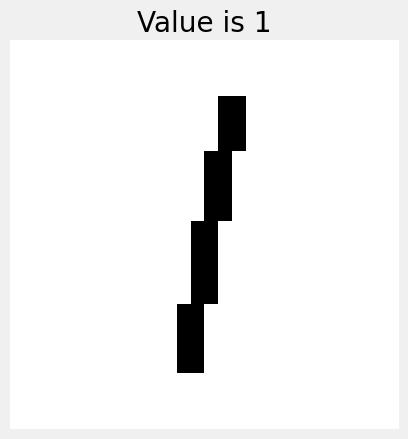

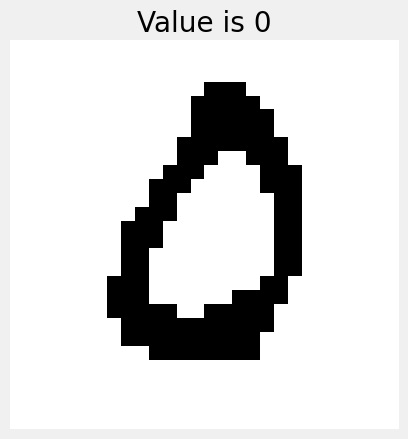

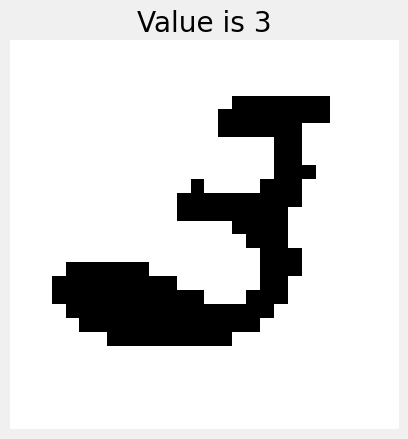

In [17]:
num_patterns = 3
(patterns,vals) = mnist_to_hopfield_patterns(num_patterns)
for i in range(num_patterns):
    plot_pattern_mnist(patterns[i],f"Value is {vals[i]}")

<details>
  <summary><strong>TA Feedback</strong></summary>
  <h4>Marks Given: 20/20</h4>
  Yeah this is good.
</details>

## Question 4


We try to create a Hopfield Classifier for MNIST data. This can be done by first selecting a random sample of initial patterns and then for each test input we let the networks run some iterations after which we compare which is the closest value and output that value

In [18]:
def compute_closest(patterns,test_pattern,vals):
    max_val = -1000000
    min_idx = -1
    for i in range(len(patterns)):
        val = np.inner(patterns[i],test_pattern)
        if val > max_val:
            max_val = val
            min_idx = vals[i]
    return min_idx

In [19]:
num_patterns = 1000
(patterns,vals) = mnist_to_hopfield_patterns(num_patterns)
reshaped_patters = []
for i in range(num_patterns):
    pattern = patterns[i].reshape(28*28)
    reshaped_patters.append(pattern)
hopfield = HopfieldNetwork(28*28)
hopfield.train(reshaped_patters)

In [20]:
import statistics

mode_value = statistics.mode(vals)

print(mode_value)

1


In [21]:
steps = 20
num_tests = 50
(test_patterns,test_vals) = mnist_to_hopfield_patterns(num_tests)
predicted_labels = []
for i in range(num_tests):
    test_pattern = test_patterns[i]
    test_pattern = test_pattern.reshape(-1)
    retrieved_pattern = hopfield.retrieve(test_pattern,steps)
    val_comp = compute_closest(reshaped_patters,retrieved_pattern,vals)
    predicted_labels.append(val_comp)

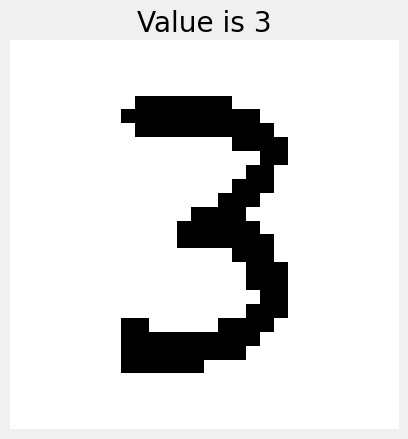

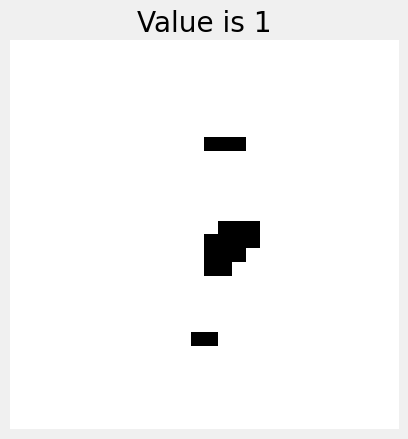

In [22]:
plot_pattern_mnist(test_patterns[0],f"Value is {test_vals[0]}")
plot_pattern_mnist(retrieved_pattern.reshape(28,28),f"Value is {val_comp}")

In [23]:
print(predicted_labels)
print(test_vals)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3 7 3 7 7 1 9 1 6 3 5 6 5 4 3 2 2 8 6 8 4 5 2 3 2 7 4 5 4 0 0 4 8 2 3 1 1
 3 0 6 0 4 0 6 1 6 6 2 6 6]


In [24]:
from sklearn.metrics import f1_score,accuracy_score

f1_macro = f1_score(test_vals, predicted_labels, average='macro')   # Macro-average
accuracy = accuracy_score(test_vals, predicted_labels)

print("F1 Macro:", f1_macro)
print("Accuracy:", accuracy)

F1 Macro: 0.01818181818181818
Accuracy: 0.1


Hopfield Networks have increadibly low accuracies and F1 scores compared to methods like Deep Learning, CNN. This is because they are simple and are not suited to high dimentional data like the one present in the MNIST data set. Also they converge really soon which is not ideal as they usually get stuck on local minima and give wrong answers.

Hopfield Networkd are ideal for usage in low dimensional binary data to correct a few error but they are really not well suited to high dimentional data

<details>
  <summary><strong>TA Feedback</strong></summary>
  <h4>Marks Given: 35/40</h4>
  Great work at operationalizing the classifier and showing how it is unfit for high dimensional binary data. You also had to show how this performance compares to standard classifers and supervised deep learning models, so I have reduced points for that.
</details>